
# MTR Next Train
The API page: https://data.gov.hk/tc-data/dataset/mtr-data2-nexttrain-data
<br><br>
Provide the arrival time information for up to the next four trains of
- Airport Express
- Tung Chung Line
- Tuen Ma Line
- Tseung Kwan O Line
- East Rail Line
- South Island Line
- Tsuen Wan Line
- Island Line
- Kwun Tong Line
<br>
<img src="https://drive.google.com/uc?id=13z5Dla1pHP-hhJ8APBhiJVoeJgDl6a9u"></img>
<br><br>
Data Dictionary: https://opendata.mtr.com.hk/doc/Next_Train_DataDictionary_v1.2.pdf <br>
API Spec: https://opendata.mtr.com.hk/doc/Next_Train_API_Spec_v1.2.pdf

In [51]:
import urllib.request, urllib.parse
import json
import pandas as pd

In [52]:
# get API data

serviceurl = 'https://rt.data.gov.hk/v1/transport/mtr/getSchedule.php'

params = {'line': 'EAL' , 'sta': 'UNI'}
url = serviceurl + '?' + urllib.parse.urlencode(params)
data = urllib.request.urlopen(url).read().decode()
js = json.loads(data)

In [53]:
js

{'sys_time': '2025-10-16 21:20:51',
 'curr_time': '2025-10-16 21:20:45',
 'data': {'EAL-UNI': {'curr_time': '2025-10-16 21:20:45',
   'sys_time': '2025-10-16 21:20:51',
   'UP': [{'seq': '1',
     'dest': 'LOW',
     'plat': '1',
     'time': '2025-10-16 21:21:45',
     'ttnt': '1',
     'valid': 'Y',
     'source': '-',
     'route': '',
     'timeType': 'A'},
    {'seq': '2',
     'dest': 'LMC',
     'plat': '1',
     'time': '2025-10-16 21:24:45',
     'ttnt': '4',
     'valid': 'Y',
     'source': '-',
     'route': '',
     'timeType': 'A'},
    {'seq': '3',
     'dest': 'LOW',
     'plat': '1',
     'time': '2025-10-16 21:28:45',
     'ttnt': '8',
     'valid': 'Y',
     'source': '-',
     'route': '',
     'timeType': 'A'},
    {'seq': '4',
     'dest': 'LOW',
     'plat': '1',
     'time': '2025-10-16 21:32:45',
     'ttnt': '12',
     'valid': 'Y',
     'source': '-',
     'route': '',
     'timeType': 'A'}],
   'DOWN': [{'seq': '1',
     'dest': 'ADM',
     'plat': '2',
    

In [54]:
js.keys()

dict_keys(['sys_time', 'curr_time', 'data', 'isdelay', 'status', 'message'])

In [55]:
js['data']['EAL-UNI']['DOWN']

[{'seq': '1',
  'dest': 'ADM',
  'plat': '2',
  'time': '2025-10-16 21:23:45',
  'ttnt': '3',
  'valid': 'Y',
  'source': '-',
  'route': '',
  'timeType': 'A'},
 {'seq': '2',
  'dest': 'ADM',
  'plat': '2',
  'time': '2025-10-16 21:27:45',
  'ttnt': '7',
  'valid': 'Y',
  'source': '-',
  'route': '',
  'timeType': 'A'},
 {'seq': '3',
  'dest': 'ADM',
  'plat': '2',
  'time': '2025-10-16 21:31:45',
  'ttnt': '11',
  'valid': 'Y',
  'source': '-',
  'route': '',
  'timeType': 'A'},
 {'seq': '4',
  'dest': 'ADM',
  'plat': '2',
  'time': '2025-10-16 21:35:45',
  'ttnt': '15',
  'valid': 'Y',
  'source': '-',
  'route': '',
  'timeType': 'A'}]

In [56]:
pd.DataFrame(js['data']['EAL-UNI']['DOWN'])

,seq,dest,plat,time,ttnt,valid,source,route,timeType
0,1,ADM,2,2025-10-16 21:23:45,3,Y,-,,A
1,2,ADM,2,2025-10-16 21:27:45,7,Y,-,,A
2,3,ADM,2,2025-10-16 21:31:45,11,Y,-,,A
3,4,ADM,2,2025-10-16 21:35:45,15,Y,-,,A


In [57]:
# makeup to be pandas df

df_down = pd.DataFrame(js['data']['EAL-UNI']['DOWN'])
df_down['bound'] = 'D'
df_up = pd.DataFrame(js['data']['EAL-UNI']['UP'])
df_up['bound'] = 'U'

df = pd.concat([df_up, df_down], ignore_index=True)
df['curr_time'] = js['curr_time']

In [58]:
df

,seq,dest,plat,time,ttnt,valid,source,route,timeType,bound,curr_time
0,1,LOW,1,2025-10-16 21:21:45,1,Y,-,,A,U,2025-10-16 21:20:45
1,2,LMC,1,2025-10-16 21:24:45,4,Y,-,,A,U,2025-10-16 21:20:45
2,3,LOW,1,2025-10-16 21:28:45,8,Y,-,,A,U,2025-10-16 21:20:45
3,4,LOW,1,2025-10-16 21:32:45,12,Y,-,,A,U,2025-10-16 21:20:45
4,1,ADM,2,2025-10-16 21:23:45,3,Y,-,,A,D,2025-10-16 21:20:45
5,2,ADM,2,2025-10-16 21:27:45,7,Y,-,,A,D,2025-10-16 21:20:45
6,3,ADM,2,2025-10-16 21:31:45,11,Y,-,,A,D,2025-10-16 21:20:45
7,4,ADM,2,2025-10-16 21:35:45,15,Y,-,,A,D,2025-10-16 21:20:45


In [59]:
# get the real station name
df_station = pd.read_csv('https://opendata.mtr.com.hk/data/mtr_lines_and_stations.csv')

In [60]:
df_station

,Line Code,Direction,Station Code,Station ID,Chinese Name,English Name,Sequence
0,AEL,DT,AWE,56.0,博覽館,AsiaWorld-Expo,1.0
1,AEL,DT,AIR,47.0,機場,Airport,2.0
2,AEL,DT,TSY,46.0,青衣,Tsing Yi,3.0
3,AEL,DT,KOW,45.0,九龍,Kowloon,4.0
4,AEL,DT,HOK,44.0,香港,Hong Kong,5.0
...,...,...,...,...,...,...,...
268,SIL,DT,OCP,86.0,海洋公園,Ocean Park,4.0
269,SIL,DT,ADM,2.0,金鐘,Admiralty,5.0
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_station.dropna(subset=['Station Code'])[['Station Code', 'Chinese Name', 'English Name']].query('`Station Code`=="ADM"')

,Station Code,Chinese Name,English Name
27,ADM,金鐘,Admiralty
41,ADM,金鐘,Admiralty
42,ADM,金鐘,Admiralty
56,ADM,金鐘,Admiralty
81,ADM,金鐘,Admiralty
92,ADM,金鐘,Admiralty
242,ADM,金鐘,Admiralty
245,ADM,金鐘,Admiralty
260,ADM,金鐘,Admiralty
269,ADM,金鐘,Admiralty


In [62]:
df_station.dropna(subset=['Line Code'])[['Station Code', 'Chinese Name', 'English Name']].drop_duplicates()

,Station Code,Chinese Name,English Name
0,AWE,博覽館,AsiaWorld-Expo
1,AIR,機場,Airport
2,TSY,青衣,Tsing Yi
3,KOW,九龍,Kowloon
4,HOK,香港,Hong Kong
...,...,...,...
241,TST,尖沙咀,Tsim Sha Tsui
261,OCP,海洋公園,Ocean Park
262,WCH,黃竹坑,Wong Chuk Hang
263,LET,利東,Lei Tung


In [63]:
df_station_mapping = df_station.dropna(subset=['Line Code'])[['Station Code', 'Chinese Name', 'English Name']].drop_duplicates()
df = df.merge(df_station_mapping, how='left', left_on='dest', right_on='Station Code')

In [64]:
df

,seq,dest,plat,time,ttnt,valid,source,route,timeType,bound,curr_time,Station Code,Chinese Name,English Name
0,1,LOW,1,2025-10-16 21:21:45,1,Y,-,,A,U,2025-10-16 21:20:45,LOW,羅湖,Lo Wu
1,2,LMC,1,2025-10-16 21:24:45,4,Y,-,,A,U,2025-10-16 21:20:45,LMC,落馬洲,Lok Ma Chau
2,3,LOW,1,2025-10-16 21:28:45,8,Y,-,,A,U,2025-10-16 21:20:45,LOW,羅湖,Lo Wu
3,4,LOW,1,2025-10-16 21:32:45,12,Y,-,,A,U,2025-10-16 21:20:45,LOW,羅湖,Lo Wu
4,1,ADM,2,2025-10-16 21:23:45,3,Y,-,,A,D,2025-10-16 21:20:45,ADM,金鐘,Admiralty
5,2,ADM,2,2025-10-16 21:27:45,7,Y,-,,A,D,2025-10-16 21:20:45,ADM,金鐘,Admiralty
6,3,ADM,2,2025-10-16 21:31:45,11,Y,-,,A,D,2025-10-16 21:20:45,ADM,金鐘,Admiralty
7,4,ADM,2,2025-10-16 21:35:45,15,Y,-,,A,D,2025-10-16 21:20:45,ADM,金鐘,Admiralty


# Traffic Snapshot Image
The API page: https://data.gov.hk/tc-data/dataset/hk-td-tis_2-traffic-snapshot-images
<br><br>
The traffic snapshot images are captured by the closed circuit televisions (CCTV) and the traffic detectors installed respectively at 194 locations and 773 locations of major roads in Hong Kong for you to visualise the latest traffic conditions.
<br><br>
<img src="https://drive.google.com/uc?id=1422KhiRBr1ZSrQ3xoAQWY_W2NTtAE7ux"></img>
<br><br>
Data Dictionary: https://static.data.gov.hk/td/traffic-snapshot-images/en/Summary_of_traffic_snapshot_images.pdf


In [65]:
import urllib.request, urllib.parse
import json
import pandas as pd

In [66]:
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [67]:
# Download positions of each cameras
df_cameras = pd.read_csv(
        'https://static.data.gov.hk/td/traffic-snapshot-images/code/Traffic_Camera_Locations_En.csv'
        , encoding="utf-16"
        , sep='\t' # You need to preview what's happened in csv, for setting these parameter.
    )

In [68]:
df_cameras.head()

,key,region,district,description,easting,northing,latitude,longitude,url
0,H429F,Hong Kong Island,Southern,Aberdeen Praya Road near Fish Market [H429F],833549.0,812187.0,22.248450,114.150500,https://tdcctv.data.one.gov.hk/H429F.JPG
1,H210F,Hong Kong Island,Wan Chai,Aberdeen Tunnel - Wan Chai Side [H210F],836525.0,815094.0,22.274700,114.179360,https://tdcctv.data.one.gov.hk/H210F.JPG
2,H421F,Hong Kong Island,Southern,Aberdeen Tunnel - Aberdeen Side [H421F],836134.0,812344.0,22.249860,114.175570,https://tdcctv.data.one.gov.hk/H421F.JPG
3,H422F2,Hong Kong Island,Southern,Ap Lei Chau Bridge Road near Aberdeen Police S...,834595.0,812166.0,22.248256,114.160644,https://tdcctv.data.one.gov.hk/H422F2.JPG
4,H904F,Hong Kong Island,Wan Chai,Canal Road Flyover near Gloucester Road [H904F],836731.0,815614.0,22.279394,114.181367,https://tdcctv.data.one.gov.hk/H904F.JPG


https://tdcctv.data.one.gov.hk/H210F.JPG


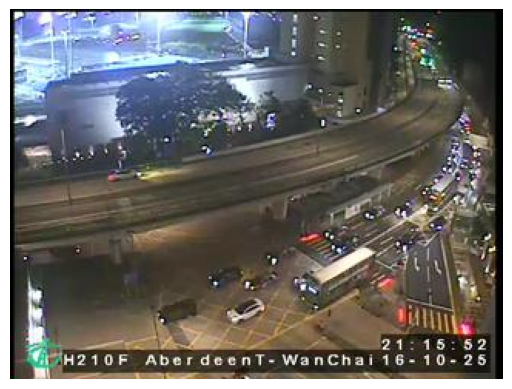

In [69]:
import urllib.request
url = df_cameras.url[1]
print(url)
from PIL import Image
import requests
import matplotlib.pyplot as plt


# Fetch the image from the URL
response = requests.get(url, stream=True)

# Check if the request was successful
if response.status_code == 200:
    img = Image.open(response.raw)
    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

else:
    print(f"Failed to fetch image. Status code: {response.status_code}")

### Instead urllib package, you can use requests package

In [70]:
df_cameras.url[0]

'https://tdcctv.data.one.gov.hk/H429F.JPG'

200


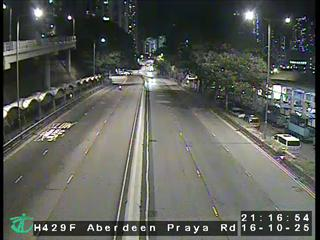

In [71]:
from PIL import Image
import requests

# Showing the image
url = df_cameras.url[0]
resp = requests.get(url, stream=True)
print(resp.status_code)
im = Image.open(resp.raw)
im

In [72]:
# Download all images
def download_image(url):
    import requests
    import os

    resp = requests.get(url, stream=True)
    filename = os.path.basename(url)
    with open(filename, 'wb') as f:
        for chunk in resp:
            f.write(chunk)

    print(f'{url} downloaded.')
    return True

# for i in df_cameras.index:
for i in df_cameras.index[0:10]:
    print(f'{i} / {df_cameras.shape[0]}')
    url = df_cameras.url[i]
    download_image(url)

0 / 987
https://tdcctv.data.one.gov.hk/H429F.JPG downloaded.
1 / 987
https://tdcctv.data.one.gov.hk/H210F.JPG downloaded.
2 / 987
https://tdcctv.data.one.gov.hk/H421F.JPG downloaded.
3 / 987
https://tdcctv.data.one.gov.hk/H422F2.JPG downloaded.
4 / 987
https://tdcctv.data.one.gov.hk/H904F.JPG downloaded.
5 / 987
https://tdcctv.data.one.gov.hk/H216F.JPG downloaded.
6 / 987
https://tdcctv.data.one.gov.hk/H305F.JPG downloaded.
7 / 987
https://tdcctv.data.one.gov.hk/H106F.JPG downloaded.
8 / 987
https://tdcctv.data.one.gov.hk/H110F.JPG downloaded.
9 / 987
https://tdcctv.data.one.gov.hk/H138F.JPG downloaded.


# Carpark Vacancy

The API page is here. ([In Traditional Chinese](https://data.gov.hk/tc-data/dataset/hk-dpo-datagovhk1-carpark-info-vacancy/resource/f4c792c6-071c-4a64-888b-afeea33d5ad7), [In English](https://data.gov.hk/en-data/dataset/hk-dpo-datagovhk1-carpark-info-vacancy/resource/01752c62-a6b6-4ddc-bf2d-25efccadc143))

<img src="https://drive.google.com/uc?id=1-MdF-gsRTdV4LmYe5IKY0v5mLlnthT-b"></img>


But how to import to your python program ? <br>


In [73]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl
import pandas as pd

serviceurl = 'https://api.data.gov.hk/v1/carpark-info-vacancy'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

parms = {}
parms['data'] = 'info'
parms['vehicleTypes'] = 'privateCar'
url = serviceurl + '?' + urllib.parse.urlencode(parms)

print('Retrieving', url)
uh = urllib.request.urlopen(url, context=ctx)
data = uh.read().decode()

print(f'Retrieved data with length {len(data)}.')

Retrieving https://api.data.gov.hk/v1/carpark-info-vacancy?data=info&vehicleTypes=privateCar
Retrieved data with length 343977.


## Loading the first row for understanding the structure

In [74]:
js = json.loads(data)
js_result = js['results']

In [75]:
js_row = js_result[0]
js_row

{'park_Id': '10',
 'name': 'Kai Tak Cruise Terminal Car Park 1',
 'nature': 'commercial',
 'carpark_Type': 'multi-storey',
 'address': {'buildingName': 'Kai Tak Cruise Terminal',
  'streetName': 'Shing Fung Road',
  'buildingNo': '33',
  'floor': '1',
  'subDistrict': 'Kowloon Bay',
  'dcDistrict': 'Kwun Tong District',
  'region': 'KLN'},
 'displayAddress': '1st floor, Kai Tak Cruise Terminal, 33 Shing Fung Road, Kowloon Bay, KLN',
 'district': 'Kwun Tong District',
 'latitude': 22.3062049,
 'longitude': 114.21309471,
 'contactNo': '+852 3465 6888, 09:30-18:00 Mon-Fri, except public holiday',
 'renditionUrls': {'square': 'https://sps-opendata.pilotsmartke.gov.hk/rest/getRendition/fs-1%3A693265207413252869411532657339312395903827562313.JPG/square.png',
  'thumbnail': 'https://sps-opendata.pilotsmartke.gov.hk/rest/getRendition/fs-1%3A693265207413252869411532657339312395903827562313.JPG/thumbnail.png',
  'banner': 'https://sps-opendata.pilotsmartke.gov.hk/rest/getRendition/fs-1%3A6932652

In [76]:
# Extracting renditionUrls

def get_url_image(js_row):
  if 'renditionUrls' not in js_row: return None
  urls_obtain = list(js_row['renditionUrls'].values())
  if len(urls_obtain)==0: return None
  return urls_obtain[0]

In [77]:
get_url_image(js_row)

'https://sps-opendata.pilotsmartke.gov.hk/rest/getRendition/fs-1%3A693265207413252869411532657339312395903827562313.JPG/square.png'

In [78]:
# Extracting privateCar

def get_todayinfo(js_row):

    from datetime import datetime as dt
    today_date_str = dt.today().strftime('%Y-%m-%d')
    today_date = dt.strptime(today_date_str, '%Y-%m-%d')
    today_weekday = today_date.strftime("%a").upper()

    dict_todayinfo = {'periodStart': None, 'periodEnd': None, 'price': None, 'space': 0}
    dict_todayinfo['today'] = today_date_str
    dict_todayinfo['today_weekday'] = today_weekday

    if 'privateCar' not in js_row: return dict_todayinfo

    for hourlyCharge in js_row['privateCar']['hourlyCharges']:
      if today_weekday in hourlyCharge['weekdays']:

        dict_todayinfo['periodStart'] = hourlyCharge.get('periodStart', None)
        dict_todayinfo['periodEnd'] = hourlyCharge.get('periodEnd', None)
        dict_todayinfo['price'] = hourlyCharge.get('price', None)

    dict_todayinfo['space'] = js_row['privateCar'].get('space', 0)

    return dict_todayinfo


In [79]:
get_todayinfo(js_row)

{'periodStart': '07:00',
 'periodEnd': '23:00',
 'price': 17,
 'space': 112,
 'today': '2025-10-16',
 'today_weekday': 'THU'}

In [80]:
# Put all the things together

columns_needed = ['park_Id', 'name', 'displayAddress', 'district', 'latitude', 'longitude', 'opening_status', 'facilities', 'paymentMethods', 'modifiedDate']

out_dict_rows = []

for js_row in js_result:

  out_dict_row = {}

  for col in columns_needed:
    out_dict_row[f'{col}'] = js_row.get(col, None)

  out_dict_row['url_image'] = get_url_image(js_row)

  dict_todayinfo = get_todayinfo(js_row)
  out_dict_row |= dict_todayinfo

  out_dict_rows.append(out_dict_row)

df_carpark = pd.DataFrame(out_dict_rows)

In [81]:
df_carpark

,park_Id,name,displayAddress,district,latitude,longitude,opening_status,facilities,paymentMethods,modifiedDate,url_image,periodStart,periodEnd,price,space,today,today_weekday
0,10,Kai Tak Cruise Terminal Car Park 1,"1st floor, Kai Tak Cruise Terminal, 33 Shing F...",Kwun Tong District,22.306205,114.213095,OPEN,"[disabilities, evCharger]","[octopus, visa]",2024-11-01 08:29:22,https://sps-opendata.pilotsmartke.gov.hk/rest/...,07:00,23:00,17.0,112,2025-10-16,THU
1,27,Yau Lai Shopping Centre Carpark,"LG1 & LG2, Yau Lai Shopping Centre, 9 Yau Tong...",Kwun Tong District,22.298512,114.237401,OPEN,"[evCharger, disabilities]",[octopus],2022-07-22 15:47:42,None,00:00,24:00,17.0,11,2025-10-16,THU
2,30,Telford Plaza D Carpark,"33 Wai Yip Street, Kowloon Bay, KLN",Kwun Tong District,22.322289,114.212043,OPEN,[evCharger],"[octopus, visa, master]",2025-05-27 12:14:21,None,00:00,24:00,22.0,70,2025-10-16,THU
3,31,Telford Plaza I Carpark,"33 Wai Yip Street, Kowloon Bay, KLN",Kwun Tong District,22.322686,114.213535,OPEN,"[evCharger, disabilities]","[octopus, visa, master]",2018-01-31 17:19:10,None,00:00,24:00,22.0,170,2025-10-16,THU
4,32,Telford Plaza II Carpark,"33 Wai Yip Street, Kowloon Bay, KLN",Kwun Tong District,22.321356,114.213266,OPEN,"[evCharger, disabilities]","[octopus, visa, master]",2018-01-31 17:19:44,None,00:00,24:00,22.0,94,2025-10-16,THU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,tdstt117,Chong San Road Car Park,"Chong San Road, Tai Po, New Territories",Tai Po,22.435145,114.200991,CLOSED,None,None,None,http://resource.data.one.gov.hk/td/carpark/tds...,None,None,NaN,0,2025-10-16,THU
493,tdstt118,Kwong Fuk Carpark Tai Po Dai Wah Street,"Dai Wah Street, Tai Po, New Territories",Tai Po,22.453461,114.179453,CLOSED,None,None,None,http://resource.data.one.gov.hk/td/carpark/tds...,None,None,NaN,0,2025-10-16,THU
494,tdstt128,Sai Kung Mei Fuk Street Car Park,Sai Kung Mei Fuk Street,Sai Kung,22.385443,114.273101,CLOSED,None,None,None,http://resource.data.one.gov.hk/td/carpark/tds...,None,None,NaN,0,2025-10-16,THU
495,tdstt130,Pinnacle Carpark Chui Shin Street,"Chui Shin Street, Area 72, Tseung Kwan O, New ...",Sai Kung,22.304841,114.255139,CLOSED,None,None,None,http://resource.data.one.gov.hk/td/carpark/tds...,None,None,NaN,0,2025-10-16,THU


# Weather
The API Page: https://data.gov.hk/tc-data/dataset/hk-hko-rss-current-weather-report

In [82]:
import urllib.request, urllib.parse
import json
import pandas as pd

import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

API reference is [here](https://data.weather.gov.hk/weatherAPI/doc/HKO_Open_Data_API_Documentation_tc.pdf)
```
dataType_value = {'flw': '本港地區天氣預報'
, 'fnd': '九天天氣預報'
, 'rhrread': '本港地區天氣報告'
, 'warnsum': '天氣警告一覽',
, 'warningInfo': '詳細天氣警告資訊'
, 'swt': '特別天氣提示'}
```

<img src="https://drive.google.com/uc?id=1447Hgdxjb3QMUfCzaCeY6cT6Uce14ekc"></img>


In [83]:
# https://data.weather.gov.hk/weatherAPI/opendata/weather.php?dataType=rhrread&lang=tc

import urllib.request, urllib.parse
import json
import pandas as pd

import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [84]:
serviceurl = 'https://data.weather.gov.hk/weatherAPI/opendata/weather.php'
params = {'dataType': 'rhrread', 'lang': 'tc'}

url = serviceurl + '?' + urllib.parse.urlencode(params)
resp = urllib.request.urlopen(url)
data = resp.read().decode()
js = json.loads(data)

df_temp = pd.DataFrame(js['temperature']['data']).rename(columns={'value': 'temperture', 'unit': 'temp_unit'})
df_rainfall = pd.DataFrame(js['rainfall']['data']).drop(columns=['main']).rename(columns={'max': 'rainfall', 'unit': 'rainfall_unit'})

df = df_temp.merge(df_rainfall, how='left', on='place')

In [85]:
df

,place,temperture,temp_unit,rainfall_unit,rainfall
0,京士柏,28,C,NaN,NaN
1,香港天文台,29,C,NaN,NaN
2,黃竹坑,27,C,NaN,NaN
3,打鼓嶺,27,C,NaN,NaN
4,流浮山,27,C,NaN,NaN
5,大埔,27,C,mm,0.0
6,沙田,27,C,mm,0.0
7,屯門,27,C,mm,0.0
8,將軍澳,27,C,NaN,NaN
9,西貢,29,C,mm,0.0


## Historical Weather

Of course you can just search the API site below
<img src="https://drive.google.com/uc?id=15FIn8LPUuBGe37SopwMew0kSgCMdJJ8E"></img>

But how to import to your python program ? <br>
Alan will demostrate in the lecture.


In [91]:
from bs4 import BeautifulSoup
import requests
from timestamp in js['timestamp']

serviceurl = 'https://app.data.gov.hk/v1/historical-archive/get-file'
params = {
    'url': 'https://app.data.gov.hk/v1/historical-archive/list-file-versions',
    'time' : timestamp
}
url = serviceurl + '?' + urllib.parse.urlencode(params)
respss = requests.get(url)
data = respss.read().decode()

SyntaxError: invalid syntax (432723182.py, line 3)